# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set() 

In [26]:
# Importo los datasets a utilizar, con los flujos vehiculares de los añoa 2017, 2018 y 2019
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [27]:
# A continuacion vamos a realizar el analisis exploratorio de datos, para conocer en que consiste nuestro dataset.
# Vamos a revisar la cantidad de registros con los que contamos en el dataset del 2019, y vamos a ver las columnas con las que contamos
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


In [28]:
# A continuacion podemos visualizar los primeros 5 registros
data_2019.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [29]:
# Vamos a realizar lo mismo para el dataset del 2018:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [30]:
# Y para el del 2017:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [31]:
# Vamos a analizar cuales son las diferentes estaciones en las cuales se registran datos en cada año. Para ellos utilizamos el metodo unique
# que nos devuelve los posibles diferentes valores de una columna, sin repeticiones.
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [32]:
# Vamos a revisar los posibles valores para la columna que almacena el sentido
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [33]:
# La clasificacion que se realiza segun tipo de vehiculo:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [34]:
# Y las diferentes formas de pago:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


Luego de investigar un poco el dataset, concluimos que las columnas que posee son:
- Periodo: el año en el que se registran los pases
- Fecha: año, mes y dia de la ocurrencia de pases
- Hora de inicio: hora en la que se inicio la cuenta de pases de vehiculos. A esta columna se la considera como drop.
- Hora de fin: hora en la que se finalizo la cuenta de pases de vehiculos, que sera utilizada para tomar la hora.
- Dia: día de la semana en que ocurrieron los pases
- Estación: lugar o estación de peaje en el que se registran los pases
- Sentido: sentido de circulacion, si se iba hacia el centro o hacia provincia
- Tipo de vehiculo: tipo de rodado, livianos o pesados
- Forma de pago: como se pago el pase, si fue con telepase, si no fue cobrado por algun motivo, si cometio infraccion, si esta exento de pagar, entre otros. Esta columna fue teniendo diferentes valores en los distintos años. En el 2017 por ejemplo, existia la posibilidad de pagar con un metodo denominado "monedero" que luego fue removido. Tener en cuenta que por ejemplo en 2019, se podia pagar con T. DISCAPACIDAD, que equivaldria a TARJETA DISCAPACIDAD en los años 2018 y 2017.
- Cantidad de pasos: numero de autos que pasaron en determinado tiempo por la estacion de peaje con las caracteristicas del registro.

In [35]:
#Vamos a unir los datasets usando el metodo concat, ya que los 3 poseen exactamente las mismas columnas. Luego vamos a filtrar por estación Illia
# y solo en forma de pago efectivo utilizando un logical and, y aplicando la mascara al dataset
# Y por ultimo, vamos a eliminar las columnas que no nos sirven. En este caso periodo, la hora de inicio ya que vamos a considerar la hora de fin 
# como el tiempo valido, la forma de pago ya que hicimos un filtro por efectivo solamente, y la estacion que como dijimos anteriormemte solo vamos a
# considerar Illia.

dataset = pd.concat([data_2019, data_2018, data_2017])

mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

# Vamos a revisar como quedaria nuestro dataset, despues del filtro de columnas, concatenado de datasets y eliminacion de estaciones diferentes 
# a Illia y pagos diferentes a efectivo:
dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [36]:
# Vamos a revisar el dataset con un describe, y vamos a chequear que no haya valores nulos
dataset.describe()

,hora_fin,cantidad_pasos
count,238869.000000,238869.000000
mean,11.874659,200.384232
std,6.739129,403.246904
min,0.000000,1.000000
25%,6.000000,2.000000
50%,12.000000,11.000000
75%,18.000000,104.000000
max,23.000000,2416.000000


In [37]:
# Para chequear que no haya ningun valor nulo en las columnas hacemos una suma de los mismos. No es necesaria una imputacion:
dataset.isnull().sum()

fecha             0
hora_fin          0
dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
dtype: int64

In [38]:
# Vamos a convertir la fecha a formato datetime uniendole la hora_fin como valor de hora en ese datetime para simplificar el dataset y lo 
# vamos a guardar en una nueva columna fecha2. Vamos a remover fecha y hora_fin ya que esa info se simplifico en el nuevo fecha2. Y al finalizar,
# volvemos el nombre de fecha2 a fecha para que las columnas queden con nombres apropiados.
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [39]:
# Vamos a ordenar el dataset por fecha ascendente
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


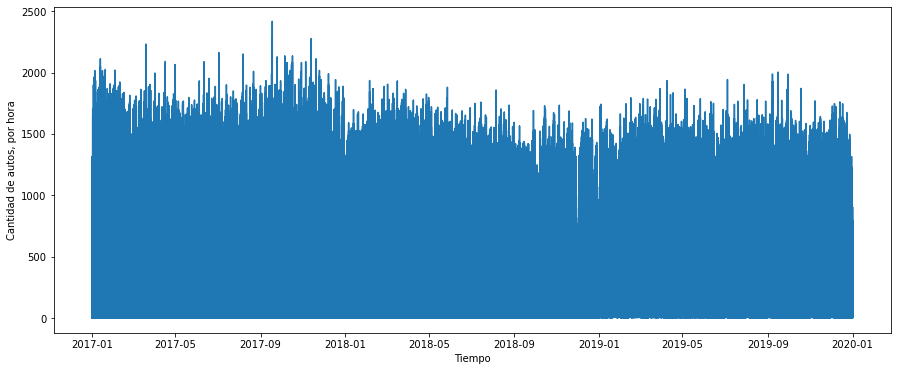

In [40]:
# Y vamos a crear nuestro primer grafico con los datos que poseemos al momento
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [43]:
#Vamos a utilizar el metodo resample para agrupar los datos por dia:
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


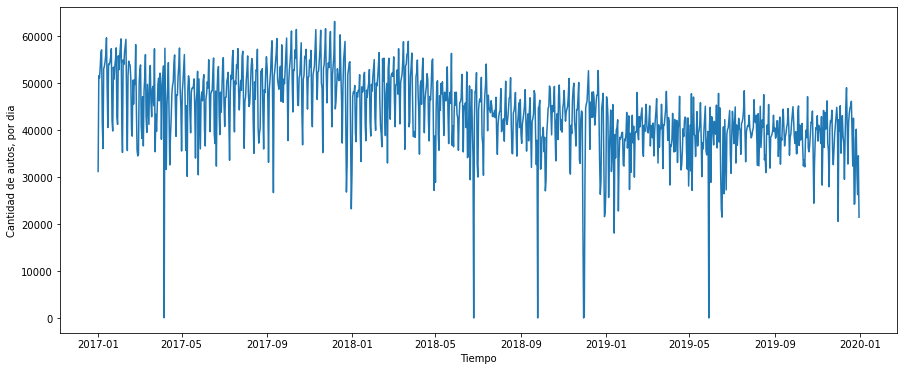

In [45]:
# Y ahora volvemos a graficar para ver si visualizamos alguna diferencia. Se puede notar un grafico mucho mas claro y comprensible.
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

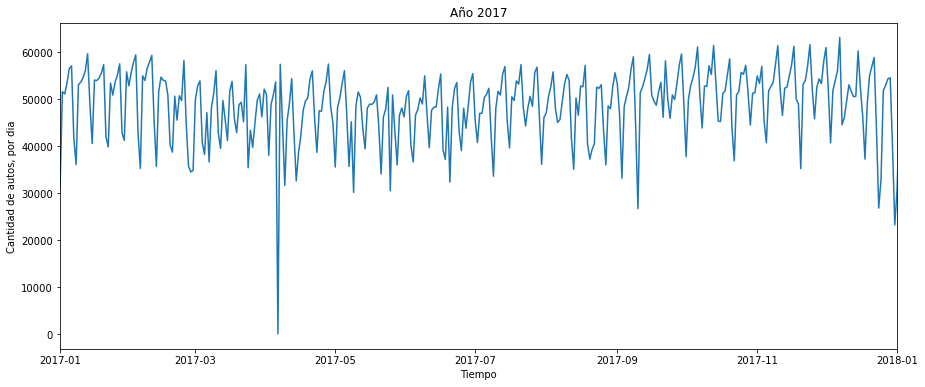

In [47]:
# Ahora vamos a realizar lo mismo, pero por año, comenzando por el 2017. Vemos que hay un valor extraño el 06/04, e investigamos y resulta
# que ese día hubo un paro de la CGT por lo q no hubo movimientos en la estacion de peaje.
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.xlim(datetime.date(2017,1,1), datetime.date(2018,1,1))
plt.ylabel('Cantidad de autos, por dia')
plt.title('Año 2017')
plt.show()

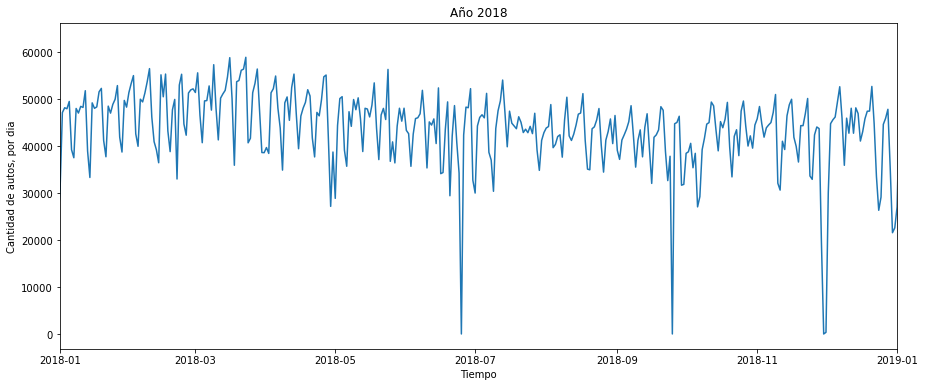

In [49]:
# A continuación, el gráfico para el 2018 en el que vemos 3 dias en los que hay 0 o pocos pases, investigamos en google y nos encontramos con que el 25/06
# hubo una huelga de la CGT, que el 25/09, hubo un paro general contra el gobierno de la CGT también, y el 29/11, fue la Cumbre de Líderes del G-20
# por lo que se decreto feriado.
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.xlim(datetime.date(2018,1,1), datetime.date(2019,1,1))
plt.ylabel('Cantidad de autos, por dia')
plt.title('Año 2018')
plt.show()

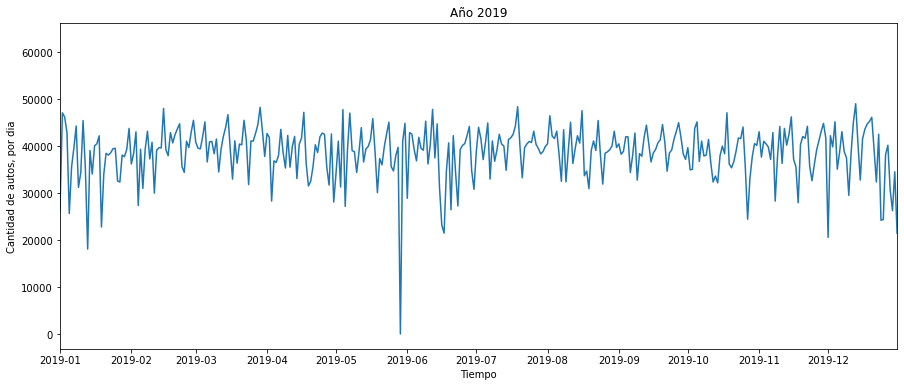

In [50]:
# Y por ultimo, vamos por el gráfico del 2019, en que que solo, el 29/05 hay 0 pases, y ese dia la CGT decreto el 5to paro general. A si que todos
# estos valores atipicos tienen claramente un sentido de ser.
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.xlim(datetime.date(2019,1,1), datetime.date(2019,12,31))
plt.ylabel('Cantidad de autos, por dia')
plt.title('Año 2019')
plt.show()

In [52]:
# Estos valores atipicos no aportan informacion relevante, ya que son aleatorios y no ocurren todos los años en la misma fecha, 
# no son estacionarios. Vamos a verificar que sean en las fechas que planteamos:
diario[diario.cantidad_pasos < 10000]

,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-30,0
2018-12-01,350
2019-05-29,0


In [53]:
# Y a continuacion vamos a proceder a eliminar estos dias del dataset
diario = diario[diario.cantidad_pasos > 10000]
diario

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259


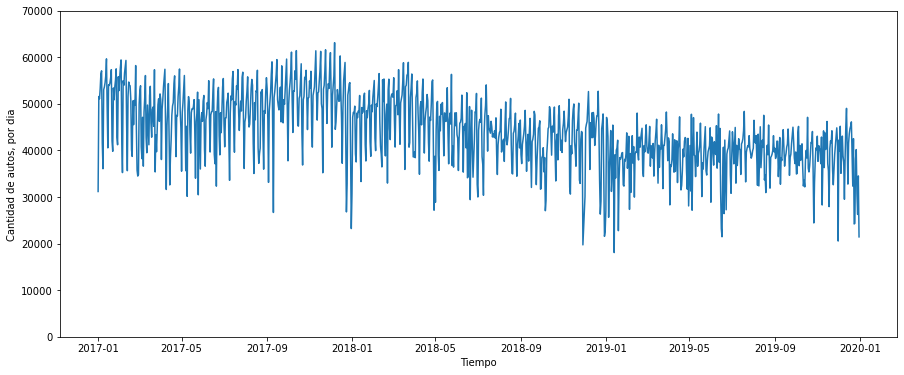

In [54]:
# Vamos a volver a graficar luego de hacer este pequeño filtrado de valores que no aportan informacion relevante
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylim(0,70000)
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [58]:
# A continuacion vamos a, con la columna dia, traducirla a una nueva columna dia_de_la_semana, en la que clasificaremos a los Lunes como dia 0,
# Martes 1, Miercoles 2...Domingo 6, ya que necesitamos valores numericos para mas adelante entrenar modelos. 
diario['dia'] = diario.index
diario['dia_de_la_semana'] = diario.dia.dt.dayofweek
diario

,cantidad_pasos,dia,dia_de_la_semana
fecha,,,
2017-01-01,31183,2017-01-01,6
2017-01-02,51568,2017-01-02,0
2017-01-03,51093,2017-01-03,1
2017-01-04,53332,2017-01-04,2
2017-01-05,56486,2017-01-05,3
...,...,...,...
2019-12-27,40182,2019-12-27,4
2019-12-28,30681,2019-12-28,5
2019-12-29,26259,2019-12-29,6


In [60]:
# Vamos a agregar una columna con la info del numero de semana del año
diario['semana_del_anio'] = diario.dia.dt.isocalendar().week
diario
#Por trimestre
#y = cantidad_pasos
#x = semana_del_anio
#agrupacion = dia_de_la_semana

,cantidad_pasos,dia,dia_de_la_semana,semana_del_anio
fecha,,,,
2017-01-01,31183,2017-01-01,6,52
2017-01-02,51568,2017-01-02,0,1
2017-01-03,51093,2017-01-03,1,1
2017-01-04,53332,2017-01-04,2,1
2017-01-05,56486,2017-01-05,3,1
...,...,...,...,...
2019-12-27,40182,2019-12-27,4,52
2019-12-28,30681,2019-12-28,5,52
2019-12-29,26259,2019-12-29,6,52


In [63]:
# Vamos a usar reset_index para reestablecer el indice del dataframe
diario.reset_index(drop=True, inplace = True)

In [64]:
diario

,cantidad_pasos,dia,dia_de_la_semana,semana_del_anio
0,31183,2017-01-01,6,52
1,51568,2017-01-02,0,1
2,51093,2017-01-03,1,1
3,53332,2017-01-04,2,1
4,56486,2017-01-05,3,1
...,...,...,...,...
1084,40182,2019-12-27,4,52
1085,30681,2019-12-28,5,52
1086,26259,2019-12-29,6,52
1087,34523,2019-12-30,0,1


In [73]:
diario['semana_del_anio'] = np.array(diario['semana_del_anio'], dtype=float)
diario['cantidad_pasos'] = np.array(diario['cantidad_pasos'], dtype=float)

(20000.0, 65000.0)

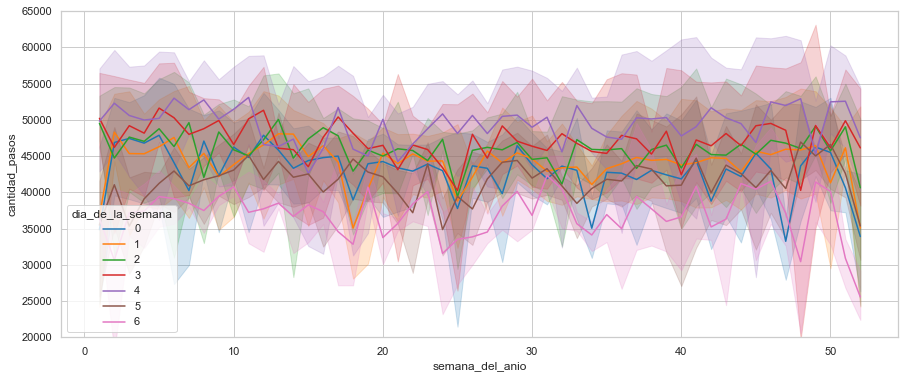

In [74]:
# Vamos a graficar la cantidad de pasos segun las semanas del año, agrupados por dia de la semana
sns.set(style="whitegrid")
color = sns.color_palette("tab10", 7)

plt.figure(figsize = (15,6))
sns.lineplot(x="semana_del_anio", y="cantidad_pasos",
             hue="dia_de_la_semana",
             data=diario, palette = color)
plt.ylim(20000,65000)
#0 -> Lunes / 6 -> Domingo

Concluimos que:
- Los jueves y viernes son los dias con mas cantidad de pasos. Mayor circulacion.
- Los domingos es el dia con menos cantidad de pasos de la semana. Hay menos circulacion.
- Los sabados hay mas circulacion que los domingos pero menos que los dias de semana laborales.
- Lunes, Martes y miercoles se mantienen en el promedio

In [75]:
# Vamos a crear nuevas columna que solo tengan el año y el mes
diario['anio'] = diario.dia.dt.year
diario['mes'] = diario.dia.dt.month
diario

,cantidad_pasos,dia,dia_de_la_semana,semana_del_anio,anio,mes
0,31183.0,2017-01-01,6,52.0,2017,1
1,51568.0,2017-01-02,0,1.0,2017,1
2,51093.0,2017-01-03,1,1.0,2017,1
3,53332.0,2017-01-04,2,1.0,2017,1
4,56486.0,2017-01-05,3,1.0,2017,1
...,...,...,...,...,...,...
1084,40182.0,2019-12-27,4,52.0,2019,12
1085,30681.0,2019-12-28,5,52.0,2019,12
1086,26259.0,2019-12-29,6,52.0,2019,12
1087,34523.0,2019-12-30,0,1.0,2019,12


(30000.0, 60000.0)

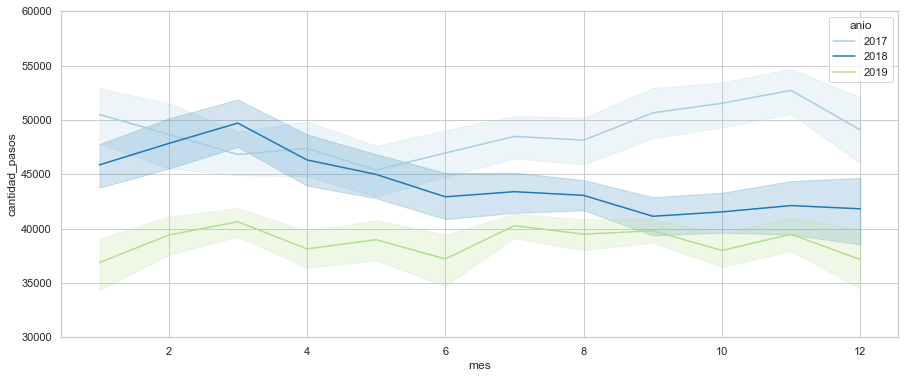

In [77]:
# Vamos a graficar la cantidad de pasos segun el año, agrupados por mes:
sns.set(style="whitegrid")
color = sns.color_palette("Paired", 3)
plt.figure(figsize = (15,6))
sns.lineplot(x="mes", y="cantidad_pasos",
             hue="anio",
             data=diario, palette = color)
plt.ylim(30000,60000)

El año 2017 pareciera ser el año en el que se registraron mas cantidad de pasos, seguido por el 2019.
En el 2019 hubieron menor cantidad, pero el numero fue mas estable a lo largo de los meses.
Se presenta un enero y un diciembre remarcado por, una menor cantidad de pasos, viendose incrementado por lo general con el paso de los meses. 
Podriamos pensar que esta disminucion en la cantidad de pasos notable del 2019 se puede deber a la devaluacion de la moneda argentina, por lo que se visualiza una tendencia decreciente en relacion a los otros años.

## Predicción a Futuro - Modelo de Machine Learning

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 
1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

In [78]:
diario.head()

,cantidad_pasos,dia,dia_de_la_semana,semana_del_anio,anio,mes
0,31183.0,2017-01-01,6,52.0,2017,1
1,51568.0,2017-01-02,0,1.0,2017,1
2,51093.0,2017-01-03,1,1.0,2017,1
3,53332.0,2017-01-04,2,1.0,2017,1
4,56486.0,2017-01-05,3,1.0,2017,1


Para poder crear el modelo, necesitamos hacer una reducción de los datos, vamos a utilizar una función para pasar de series de tiempo a una tabla:

In [79]:
def split_into_train_test(data, window_size, horizon):
    """
    Splits the series into train and test sets. Each step takes multiple points as inputs
    :param data: an individual TS
    :param window_size: number of input points for the forecast
    :param horizon: number of out of sample points
    :return:
    """
    train, test = data[:-horizon], data[-(horizon + window_size):]
    X_train, y_train = train[:-1], np.roll(train, -window_size)[:-window_size]
    X_test, y_test = test[:-1], np.roll(test, -window_size)[:-window_size]

    # Hago el reshape
    X_train = np.reshape(X_train, (-1, 1))
    X_test = np.reshape(X_test, (-1, 1))
    temp_test = np.roll(X_test, -1)
    temp_train = np.roll(X_train, -1)
    for x in range(1, window_size):
        X_train = np.concatenate((X_train[:-1], temp_train[:-1]), 1)
        X_test = np.concatenate((X_test[:-1], temp_test[:-1]), 1)
        temp_test = np.roll(temp_test, -1)[:-1]
        temp_train = np.roll(temp_train, -1)[:-1]

    return X_train, y_train, X_test, y_test

In [80]:
diario.cantidad_pasos.values

array([31183., 51568., 51093., ..., 26259., 34523., 21447.])

In [83]:
# A continuacion vamos a dividir el dataset en train - test y vamos a definir una ventana de tiempo
# (look_back: tiempo en pasado usado para predecir), un horizonte de tiempo (tiempo predicho), datos(numero de pasos)
# Vamos a usar para predecir en nuestro modelo la info de el año anterior, es decir, 365 dias antes
ventana = 365    # 365 dias 
horizonte = 90   # trimestre
serie_tiempo = diario.cantidad_pasos.values
X_train, y_train, X_test, y_test = split_into_train_test(serie_tiempo, ventana, horizonte)

# Y visualizamos como quedo el numero de columnas y registros de train y test
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(634, 365) (634,)
(90, 365) (90,)


In [84]:
# A continuacion vamos a crear y entrenar a nuestro modelo:

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

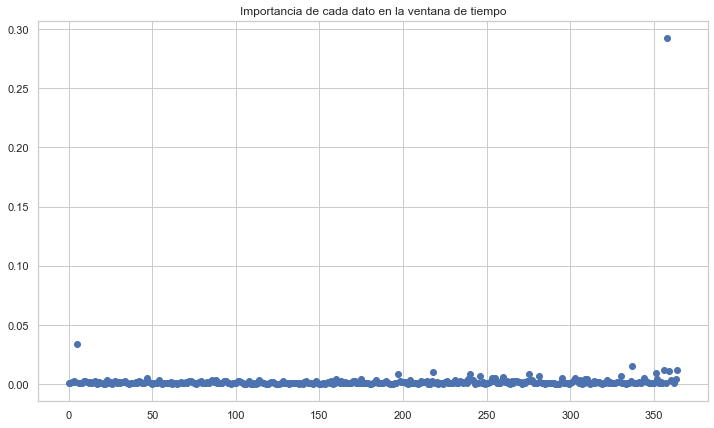

In [86]:
# Y vamos a graficamos la importancia de cada dato de nuestra ventana

plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
plt.title('Importancia de cada dato en la ventana de tiempo')
plt.show()

Podemos ver que los datos mas importantes son, hace un año, y los últimos dias del año. Un año atras es el valor que mas importancia tiene en nuestra ventana de tiempo, por ende, los momentos mas importantes son por los dias 0 ( hace un año), y los ultimos dias del año (350 dias en adelante aprox)

**ONE STEP**

In [87]:
#y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [92]:
# Vamos a calcular el error en train y test usando mean squared error:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1878.1479238587133
Error en Test: 6052.046016065605


In [93]:
senial = diario.cantidad_pasos
senial

0       31183.0
1       51568.0
2       51093.0
3       53332.0
4       56486.0
         ...   
1084    40182.0
1085    30681.0
1086    26259.0
1087    34523.0
1088    21447.0
Name: cantidad_pasos, Length: 1089, dtype: float64

In [94]:
look_back = ventana

N_train = len(y_train)
N_test = len(y_test)

N_total = N_train + N_test

length_total = N_train + N_test + look_back

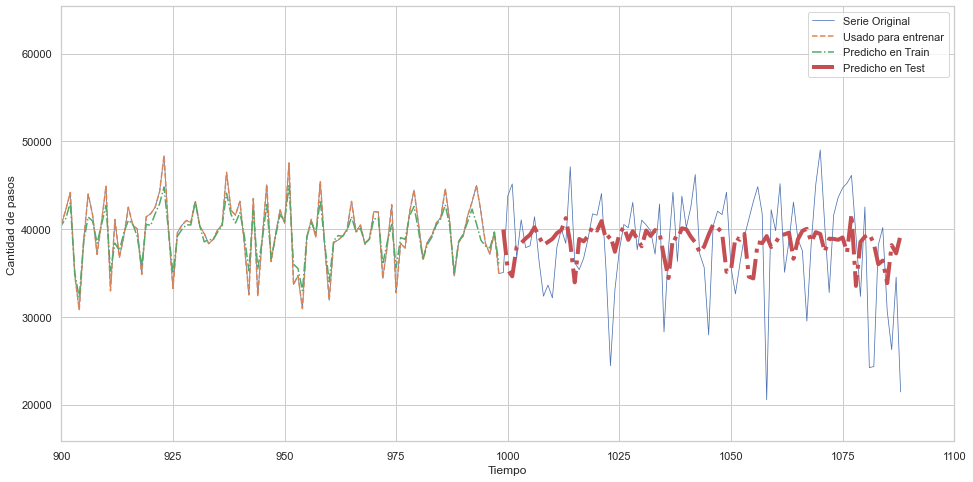

In [95]:
# Vamos a graficar nuevamente la prediccion:

plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.xlim(900,1100)
plt.show()

OPTIMIZACION DE HIPERPARAMETROS usando GRID SEARCH:

In [117]:
# Vamos a volver a entrenar al modelo con los mejores hiperparametros usando GridSearch

param_grid = {'n_estimators':[10,50,100],
              'max_depth':[5,10,14],
              'max_features': ['sqrt2', 'log2',2,8],
              'min_samples_leaf':[3,5,10],
              'min_samples_split':[6,8,10],
               'max_leaf_nodes':[10,30,None]}
#model = RandomForestRegressor(random_state=42)
#gs = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error',n_jobs=5)
#gs.fit(X_train,y_train)

#print(gs.best_params_)
#print(-gs.best_score_)

In [118]:
rfr = RandomForestRegressor(max_depth=10,max_features='log2',min_samples_leaf=3,
                            min_samples_split=6,max_leaf_nodes=None,n_estimators=100,random_state=42,n_jobs=4).fit(X_train,y_train)

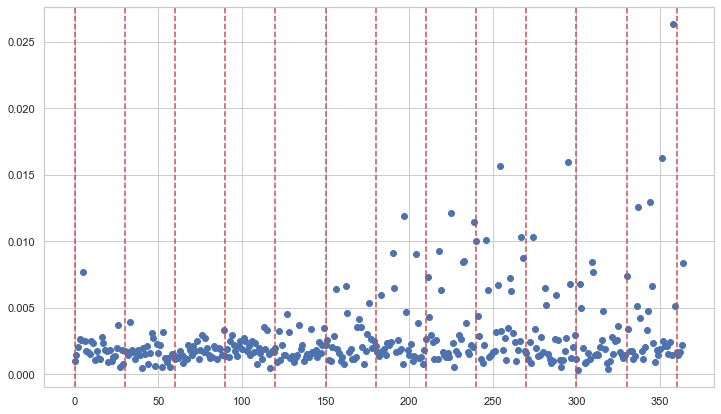

In [119]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rfr.feature_importances_.size),rfr.feature_importances_)
for x in np.arange(13)*30:
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

#Podemos analizar que los puntos del gráfico anterior mantienen la misma importancia. 
#Pero los demás puntos incrementan su importancia a medida que los días del año van incrementando.
#Por lo que para predecir son más importantes los días dentro de un rango de 150 días a 365.
#Siendo los que en los últimos 6 meses del año la importancia de los datos aumenta para la predicción futura.

In [120]:
#Predicción

#y_pred = rf.predict(X)
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

In [121]:
#Calculamos el error 
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 2860.7381874343564
Error en Test: 5818.637668815879


In [122]:
senial = diario.cantidad_pasos
senial

0       31183.0
1       51568.0
2       51093.0
3       53332.0
4       56486.0
         ...   
1084    40182.0
1085    30681.0
1086    26259.0
1087    34523.0
1088    21447.0
Name: cantidad_pasos, Length: 1089, dtype: float64

In [123]:
look_back = ventana

N_train = len(y_train)
N_test = len(y_test)

N_total = N_train + N_test

length_total = N_train + N_test + look_back

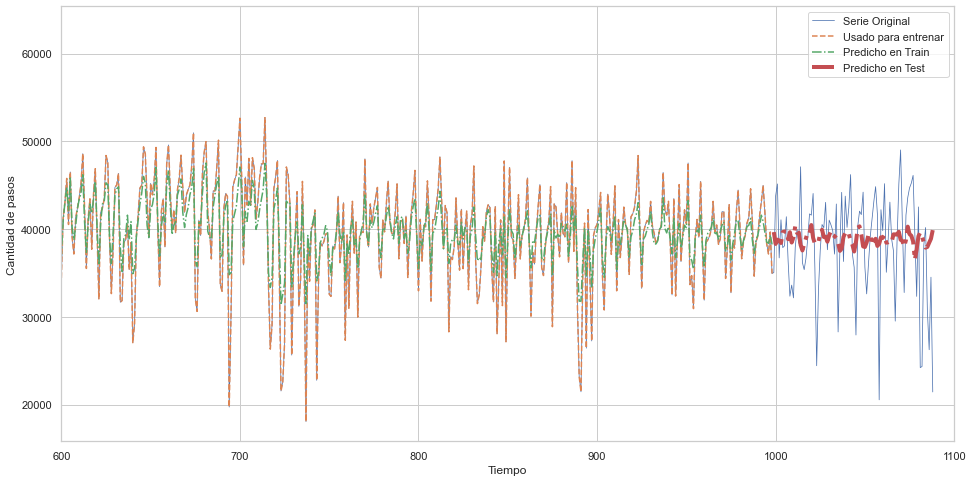

In [124]:
# Vamos a graficar la predicción

plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.xlim(600,1100)
plt.show()

**MULTI-STEP**

A continuación, con el modelo entrenado vamos a usar el método recursivo para hacer Multi-Step prediction:

In [127]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

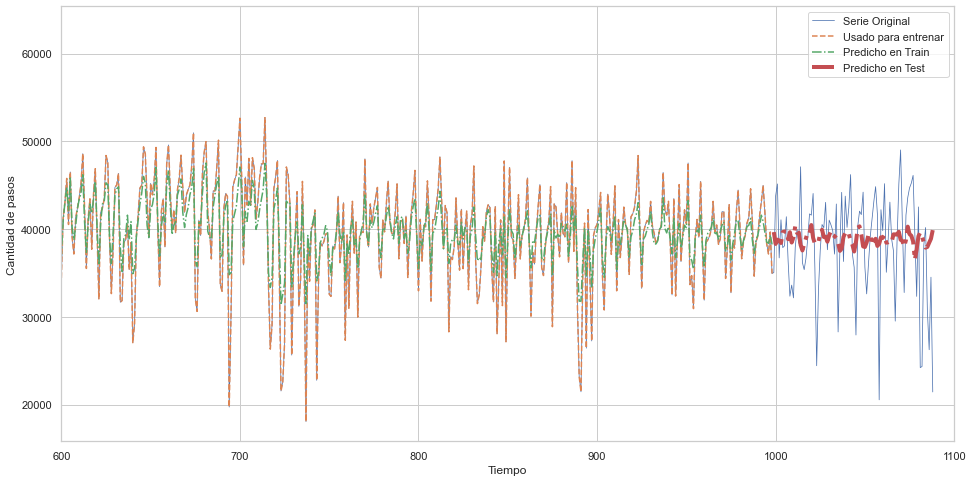

In [128]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.xlim(600,1100)
plt.show()

In [129]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Train:',np.sqrt(MSE))

Error en Train: 6222.390419810987


**BENCHMARK**

Como modelo de benchmark vamos a utilizar el valor de la fecha anterior.
Comparamos el error con el que habríamos obtenido si predecíamos copiando el valor de la fecha anterior.

In [130]:
X_train.size

231410

In [131]:
y_train.size

634

In [132]:
last = y_train[-1]

In [133]:
type(y_test)

numpy.ndarray

In [134]:
y_test.shape

(90,)

In [135]:
y_test_pred_benchmark = np.ones(shape = y_test.shape) * last
y_test_pred_benchmark

array([34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943., 34943., 34943., 34943., 34943., 34943., 34943.,
       34943., 34943.])

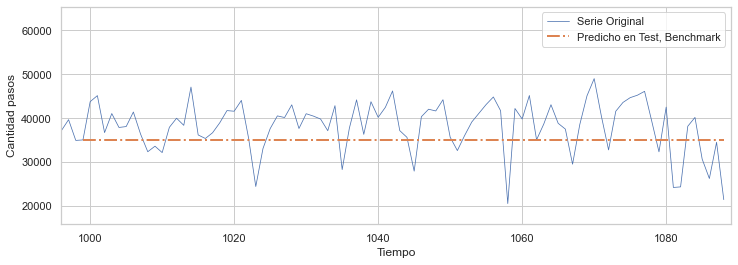

In [136]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
#plt.xlim(senial.index[N_train+look_back], senial.index[length_total-1])
plt.xlim(996,1089)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad pasos')
plt.legend()
plt.show()

In [137]:
MSE = mean_squared_error(y_test, y_test_pred_benchmark)
print('Error en Train:',np.sqrt(MSE))

Error en Train: 6674.689455947246


## CONCLUSIONES: 
Los resultados obtenidos en los diferentes modelos son los siguientes:

Utilizando **ONE STEP**:

    - Error en Train: 1878.1479238587133
    - Error en Test: 6052.046016065605

Utilizando **ONE STEP con GRID SEARCH**:

    - Error en Train: 2860.7381874343564
    - Error en Test: 5818.637668815879
    
Utilizando **MULTI STEP**:

    - Error en Train: 6222.390419810987

**Benchmark**:

    - Error en Train: 6674.689455947246

Analizando estos resultados, podemos ver que, claramente el peor modelo es nuestro benchmark, el modelo base de comparación que se basa en el valor o la cantidad de pasos mejor dicho, del dia anterior. Este modelo es el mas sencillo ya que no considera una look back o ventana de tiempo muy grande. Asi que tiene sentido que sea nuestro modelo con el cual obtenemos mayor error de todos.

Seguido de este, tenemos a nuestro modelo MULTI STEP, que si bien mejora a nuestro benchmark, sigue obteniendo un error bastante alto en relacion al modelo de ONE STEP.

Al aplicar GRID SEARCH, oprimizamos los parametros de entrenamiento del modelo, obteniendo asi un error en test de 5818.64, lo cual lo hace ser nuestro mejor modelo en conclusion. Incluso, la diferencia de error entre train y test es la mas chica que podemos obtener a comparacion del modelo con ONE STEP solamente, cuyo error entre train y test resulta mucho mas amplio.

#### A continuación, en el siguienre trabajo se plantean preguntas en las que se podria ahondar:

- **¿La gente que viaja por trabajo en horarios pico de lunes a viernes se adhieren al telepase?**

    Por ejemplo, durante el horario de transporte hacia el trabajo (de 7 am a 9 am y de 5 pm a 7pm), hay mas personas adheridas al telepase, o no tiene nada que ver? Influyen los horarios pico en la adhesion de nuevos clientes al servicio de telepase?
    
    Esta pregunta nos podría ayudar a sacar conclusiones sobre el uso del telepase. Muy probablemente, las personas que necesitan pasar por un peaje en un horario pico como los horarios de traslado hacia los trabajos o hacia el hogar, se encuentren adheridos a un servicio de telepeaje. Incluso se podría realizar esta investigación haciendo un filtro por estación, y ver en cuales estaciones es necesario reforzar la adhesion al servicio para agilizar las colas de espera para pagar en efectivo o con alguna otra forma de pago.
    
    Para implementar esto, deberíamos agrupar los pases por dias de la semana(lunes a domingo), filtrando por cada una de las estaciones, y quedandonos solo con los registros de estos horarios picos mensionados anteriormente. Deberiamos realizar graficos en base a los medios de pago, y podriamos entrenar de nuevo los modelos que realizamos anteriormente, y analizar como son las nuevas predicciones de los mismos para sacar nuevas conclusiones.
    
- **¿Influye el receso de verano y de invierno de los colegios en el numero de pases en las estaciones?

    Primero que nada, eligiria alguna estacion de peaje que se encuetre cerca de algun colegio importante de la ciudad. Haria lo mismo para 3 o 4 estaciones distintas ubicadas dentro de instituciones escolares importantes como para tener mayor información. Luego, me centraria en analizar como varían los pases en esas estaciones especificas, en los meses de diciembre, marzo y julio, con fechas exactas de inicio y finalizacion de vacaciones de los niños, y analizaria como van a ir disminuyendo o no a lo largo de los años la cantidad de pases cuando ocurre la baja de movilización por vacaciones. Tambien estaría bueno considerar alguna estacion alejada de colegios, para ver como afectaria la creacion de una nueva institucion cercana al mismo en el flujo de autos. Entrenaría nuevamente los modelos (One Step, One Step con optimización de hiperparámetros, Multi Step y nuestro Benchmark). para sacar nuevas conclusiones y ver si afecta o no las fechas de vacaciones de los chicos en los pases.



## REPOSITORIO EN GITHUB: